## 프로젝트1. 가상 쇼핑몰 고객 주문 데이터 파악하기

### 1-1. 데이터셋
* 가상 온라인 디테일 사이트의 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건의 데이터

In [1]:
import numpy as np
import pandas as pd

In [2]:
filename2 = 'data/OnlineRetail.csv'
retail = pd.read_csv(filename2, sep = ',')

In [3]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# invoiceNo    : 주문 번호
# StockCode    : 아이템 아이디
# Description  : 상품 설명
# Quantity     : 상품 주문 수량
# invoiceData  : 주문 날짜, 주문 시간
# UnitPrice    : 상품 가격
# CustomerID   : 고객 아이디
# Country      : 고객 거주 지역(국가)

In [6]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# 각 필드(항목)당 null이 몇 개 있는지 확인해보자.

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# CustomerID의 Null을 제거하자.

retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

In [11]:
# 수량하고 가격이 0보다 큰 데이터만 저장하자.

retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

397884

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [13]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [14]:
# 고객의 총 지출비용(checkoutPrice) = 수량 * 가격

retail['checkoutPrice'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### -- 정제된 데이터 저장 --

In [15]:
retail.to_csv('data/OnlineRetail_01.csv')

In [16]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
}

retail = pd.read_csv('data/OnlineRetail_01.csv', dtype = dtypes)

In [17]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [18]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   checkoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


### 1-2. 날짜 타입 데이터 변환
* 문자열로 데이터를 로딩하는 것보다 Datetime 타입으로 로딩하는 것이 분석 및 계산에 용이함.

In [19]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)

In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   checkoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [21]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [22]:
# 전체 매출을 확인해 보자.

total_revenue = retail['checkoutPrice'].sum()

In [23]:
total_revenue

8911407.904

In [24]:
# 국가별 매출

rev_by_countries = retail.groupby('Country').sum()['checkoutPrice'].sort_values()

In [25]:
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

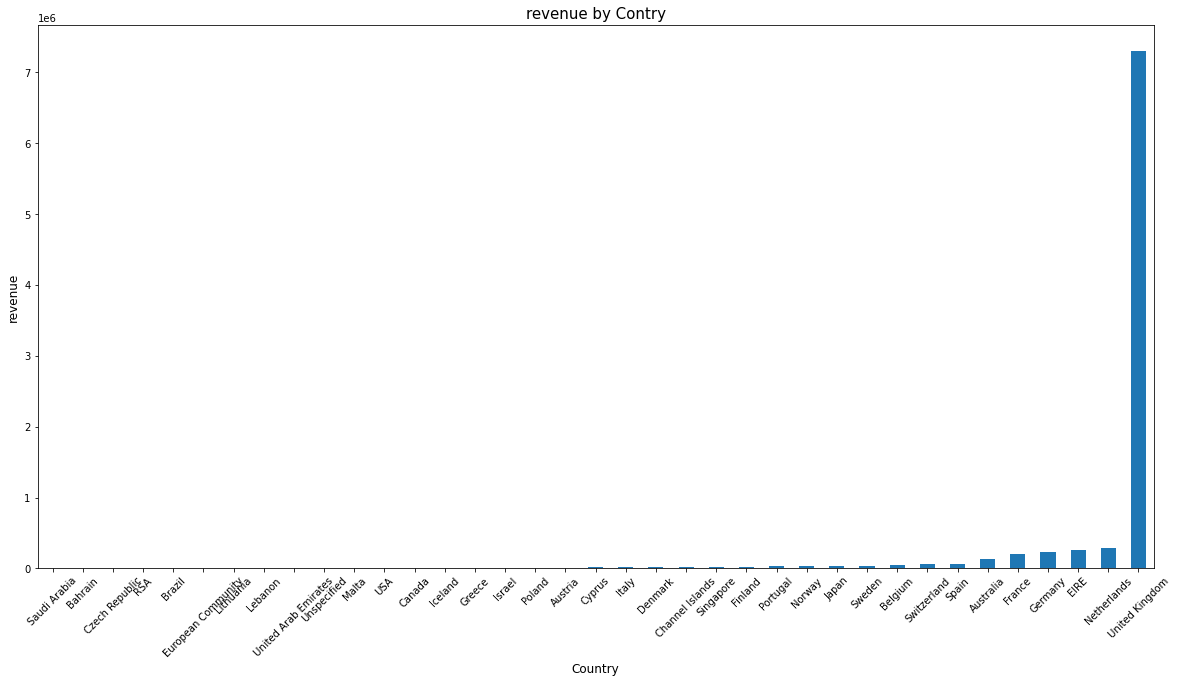

In [26]:
plot = rev_by_countries.plot(kind = 'bar', figsize = (20, 10))
#                                            그래프 크기가 달라짐
plot.set_xlabel('Country', fontsize = 12)
plot.set_ylabel('revenue', fontsize = 12)
plot.set_title('revenue by Contry', fontsize = 15)
plot.set_xticklabels(labels = rev_by_countries.index, rotation = 45)
#                                                        글자 기울기

In [27]:
percent = (rev_by_countries / total_revenue) * 100
percent

Country
Saudi Arabia             0.001637
Bahrain                  0.006154
Czech Republic           0.009277
RSA                      0.011247
Brazil                   0.012833
European Community       0.014591
Lithuania                0.018640
Lebanon                  0.019008
United Arab Emirates     0.021347
Unspecified              0.029929
Malta                    0.030585
USA                      0.040178
Canada                   0.041143
Iceland                  0.048365
Greece                   0.053421
Israel                   0.081039
Poland                   0.082306
Austria                  0.114445
Cyprus                   0.152505
Italy                    0.196189
Denmark                  0.212709
Channel Islands          0.229486
Singapore                0.238787
Finland                  0.253002
Portugal                 0.375248
Norway                   0.405833
Japan                    0.419870
Sweden                   0.430665
Belgium                  0.462288
Switze

### 1-3. 월별 매출

In [34]:
#retail['InvoiceDate'].sort_values(ascending = True)
# 오름차순

retail['InvoiceDate'].sort_values(ascending = False)
# 내림차순

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [37]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [40]:
#retail

In [48]:
#                    1                       2->2'      4          3
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['checkoutPrice']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: checkoutPrice, dtype: float64

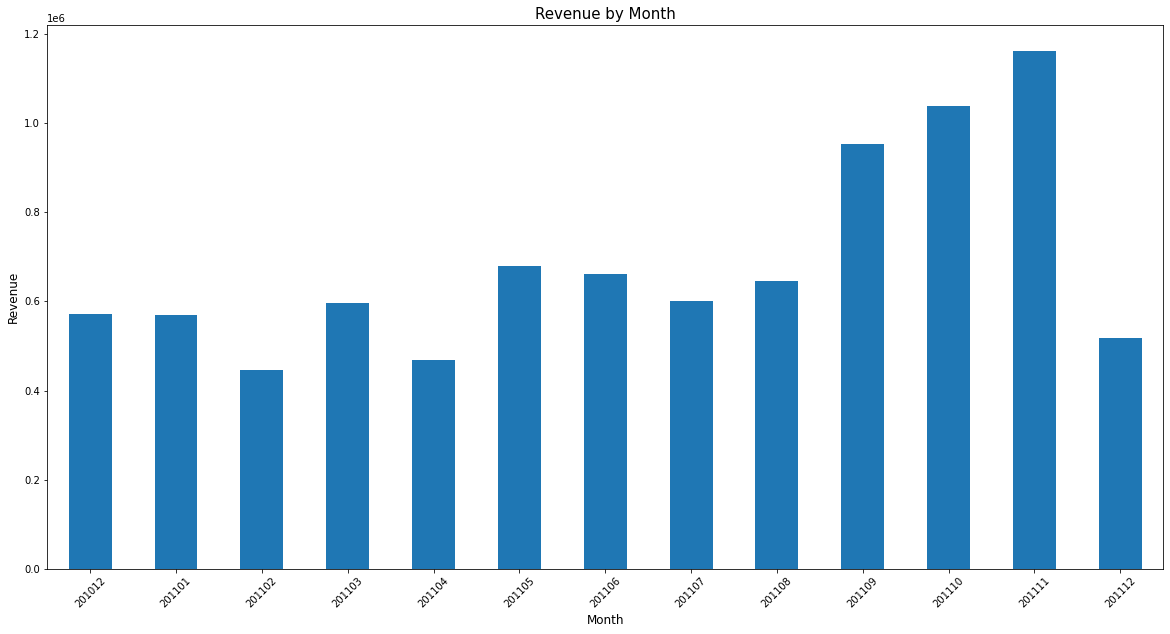

In [49]:
def plot_bar(df, xlabel, ylabel, title, figsize = (20, 10), rotation = 45):
    plot = df.plot(kind = 'bar', figsize = figsize)
    plot.set_xlabel(xlabel, fontsize = 12)
    plot.set_ylabel(ylabel, fontsize = 12)
    plot.set_title(title, fontsize = 15)
    plot.set_xticklabels(labels = df.index, rotation = rotation)
    
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### 1-4. 요일별 매출

In [50]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date : date.dayofweek).sum()['checkoutPrice']
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: checkoutPrice, dtype: float64

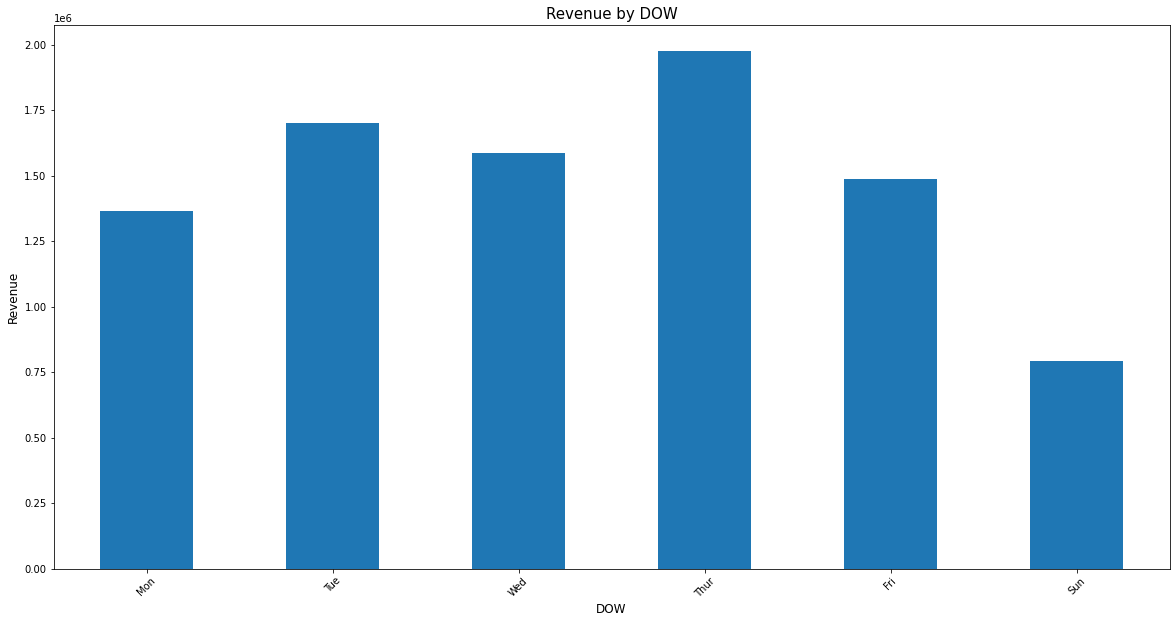

In [51]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
#                        0       1      2       3      4      5      6
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

### 1-5. 시간별 매출

In [52]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).sum()['checkoutPrice']
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: checkoutPrice, dtype: float64

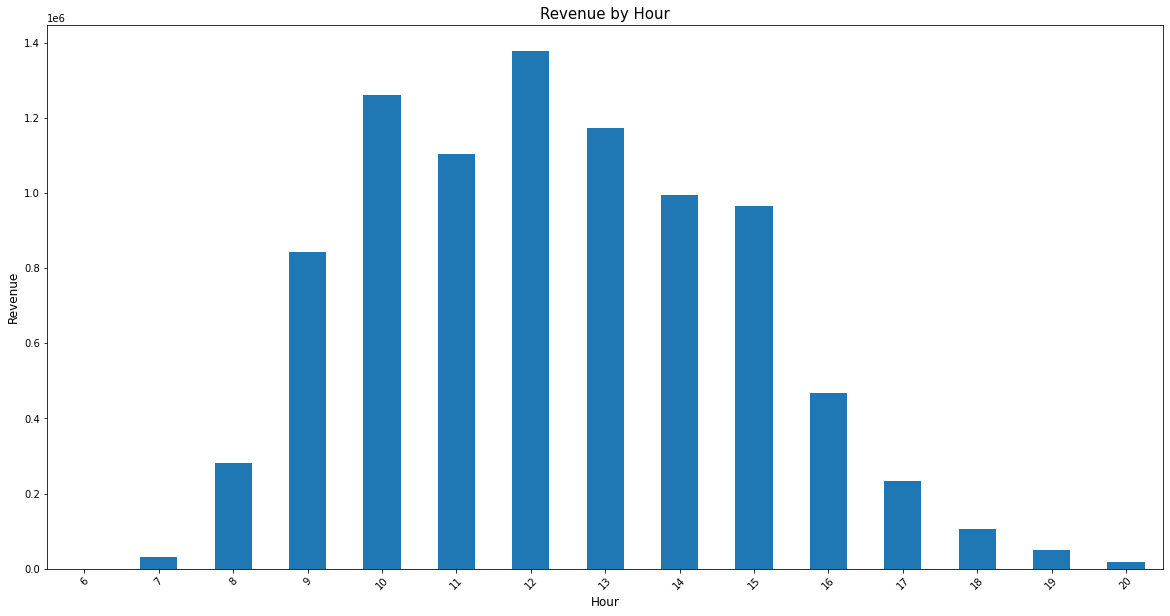

In [53]:
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by Hour')

### 1-6. 매출 데이터의 결과 분석
* 전체 매출의 82%가 영국에서 발생
* 2011년도 가장 높은 매출 발생, 달은 11월
* 일주일 중 목요일까지는 성장세, 이후는 하락세(토 : 휴무)
* 6시에 개장, 12시에 성장세, 오후 3시 이후 급락

In [54]:
retail

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [57]:
# 판매 제품 (Quantity) Top 10

top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending = False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [58]:
# 매출 제품(checkoutPrice) Top 10

top_revenue = retail.groupby('StockCode').sum()['checkoutPrice'].sort_values(ascending = False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: checkoutPrice, dtype: float64

### 1-8. 우수 고객 확인

In [59]:
# 구매 횟수 기준(Quantity) top 10

vip = retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending = False)[:10]
vip

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [60]:
# 지불 금액 기준(checkoutPrice)

vvip = retail.groupby('CustomerID').sum()['checkoutPrice'].sort_values(ascending = False)[:10]
vvip

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: checkoutPrice, dtype: float64

### 1-9. 사용자 기준으로 최초 구매한 월(month) 연산하기

In [62]:
# invoiceDate
# Month --> 2011-12-01, 02 ~~
# MonthStarted 2011-12-01
#                   11-01

from datetime import datetime

In [69]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1) # 2010-11-01

#retail['InvoiceDate'].apply(get_month_as_datetime)
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail['Month']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
397879   2011-12-01
397880   2011-12-01
397881   2011-12-01
397882   2011-12-01
397883   2011-12-01
Name: Month, Length: 397884, dtype: datetime64[ns]

In [71]:
retail

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01


In [75]:
# 사용자 그룹으로 그룹단위 월별 통계 집계
month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted'] = month_group.transform(np.min)
retail.head()
#retail

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,Month,MonthStarted
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01


In [76]:
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,Month,MonthStarted
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


### 1-10. 기준이 되는 월과 실제 구매 월의 차이 계산하기

In [78]:
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
(retail['Month'].dt.month - retail['MonthStarted'].dt.month)

#retail.head()
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,Month,MonthStarted,MonthPassed
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [80]:
retail.to_csv('data/OnlineRetail_end.csv')
#retail.to_csv('OnlineRetail_end.csv')